In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/data.csv
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/config_sentinel
/content/.config/gce
/content/.config/active_config
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/configurations/config_default
/content/.config/logs/2024.03.20/14.00.20.338587.log
/content/.config/logs/2024.03.20/14.00.40.646109.log
/content/.config/logs/2024.03.20/14.00.39.913971.log
/content/.config/logs/2024.03.20/13.59.42.969210.log
/content/.config/logs/2024.03.20/14.00.09.152316.log
/content/.config/logs/2024.03.20/14.00.29.025423.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


In [3]:
df = pd.read_csv('/content/data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [8]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [9]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


<Axes: >

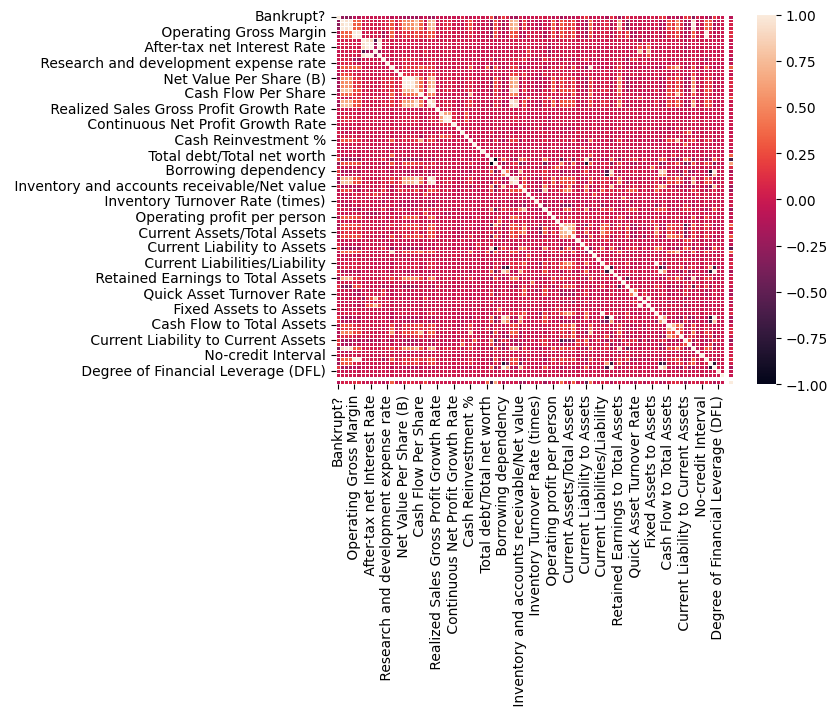

In [3]:
fig, ax = plt.subplots()
data_corr = df.corr()
sns.heatmap(data_corr, linewidths=0.5)

## Regression

**Target:** Net Income to Total Assets

In [10]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
data_corr = data_corr.abs()

sol = (data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

features = []
corr = []

for index, value in sol.items():
  if(index[0] == ' Net Income to Total Assets'):
      print(index[1],':', value)
      features.append(index[1])
      corr.append(value)

 Net Income to Stockholder's Equity : 0.32849183254448744
 Gross Profit to Sales : 0.30014565104815477
 Liability to Equity : 0.1596965181019577
 Total assets to GNP price : 0.10520070101982276
 Equity to Liability : 0.07391570862347022
 Interest Coverage Ratio (Interest expense to EBIT) : 0.012746126768264384
 No-credit Interval : 0.01194157755569632
 Degree of Financial Leverage (DFL) : 0.010462886108426423


In [12]:
X = df.drop(columns=' Net Income to Total Assets')
y = df[' Net Income to Total Assets']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
models = {
    'LinearRegression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'RandomForestRegressor': RandomForestRegressor()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[name] = {
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),       # RMSE
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAE_train': mean_absolute_error(y_train, y_pred_train),                # MAE
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'R2_train': r2_score(y_train, y_pred_train),                            # R2
        'R2_test': r2_score(y_test, y_pred_test)
    }

In [17]:
results_df = pd.DataFrame(results).T
results_df

,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
LinearRegression,0.007124,2.718283e+07,0.003761,845047.059676,0.970146,-5.082982e+17
ElasticNet,0.040084,3.752625e-02,0.024079,0.023977,0.054850,3.127717e-02
GradientBoostingRegressor,0.002230,6.270996e-03,0.001453,0.002094,0.997076,9.729478e-01
KNeighborsRegressor,0.030986,3.671676e-02,0.019120,0.023557,0.435204,7.261974e-02
RandomForestRegressor,0.003645,5.218281e-03,0.000686,0.001632,0.992186,9.812680e-01


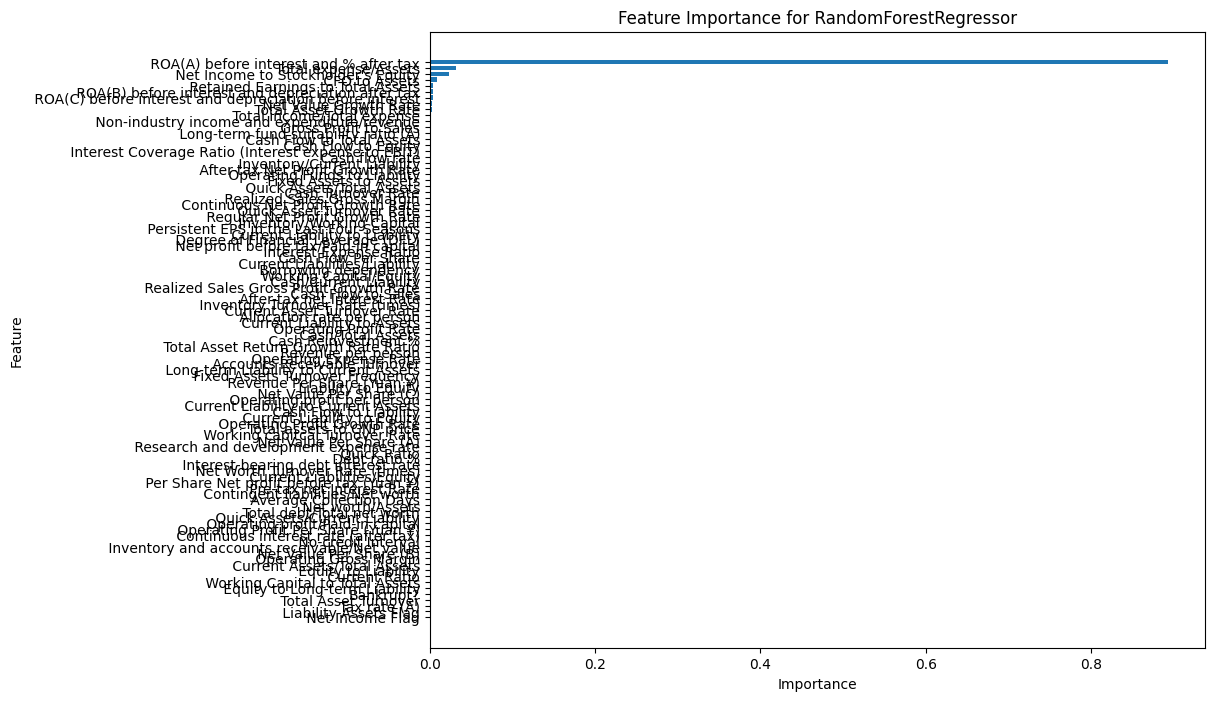

In [19]:
feature_importances = models['RandomForestRegressor'].feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for RandomForestRegressor')
plt.show()

In [20]:
num_features_to_keep = 5

top_features = features_df.sort_values(by='Importance', ascending=False).head(num_features_to_keep)

X_top_features = X[top_features['Feature']]

X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=42)

In [24]:
param_grid_gb = {
    'n_estimators': [100, 200],
    'max_depth': [5, 15, 30],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [2, 3]
}

grid_search_gb = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)

grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = np.sqrt(-grid_search_gb.best_score_)

best_params_gb, best_score_gb

Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'max_depth': 30,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.008547032329298552)

In [25]:
cv_results = []
scores = cross_val_score(grid_search_gb.best_estimator_, X_top_features, y, cv=5, scoring='r2')
cv_results.append(scores)

cv_results

[array([0.97362396, 0.93124249, 0.96796416, 0.98806583, 0.97394944])]

In [26]:
train_sizes, train_scores, test_scores = learning_curve(grid_search_gb.best_estimator_, X_top_features, y, cv=3, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

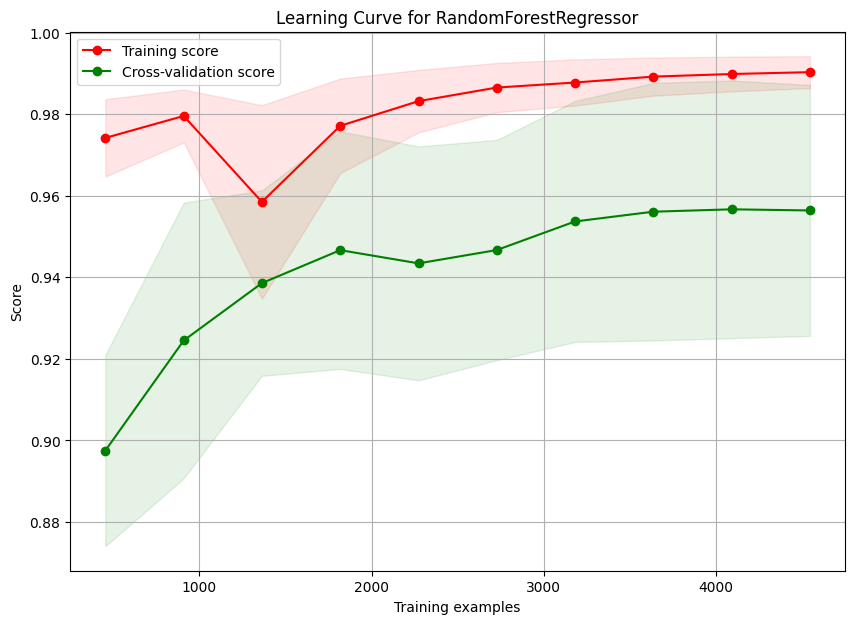

In [27]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for RandomForestRegressor")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Classification

**Target:** Bankrupt




In [28]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, classification_report

In [29]:
data_corr = data_corr.abs()

sol = (data_corr.where(np.triu(np.ones(data_corr.shape), k=1).astype(bool))
                  .stack()
                  .sort_values(ascending=False))

features = []
corr = []

for index, value in sol.items():
  if(index[0] == 'Bankrupt?'):
      print(index[1],':', value)
      features.append(index[1])
      corr.append(value)

 Net Income to Total Assets : 0.31545697161429936
 ROA(A) before interest and % after tax : 0.28294058493448865
 ROA(B) before interest and depreciation after tax : 0.2730513178632931
 ROA(C) before interest and depreciation before interest : 0.2608065575202611
 Net worth/Assets : 0.25016096206661936
 Debt ratio % : 0.25016096206661775
 Persistent EPS in the Last Four Seasons : 0.2195596811907876
 Retained Earnings to Total Assets : 0.21777877998712378
 Net profit before tax/Paid-in capital : 0.20785651999287655
 Per Share Net profit before tax (Yuan ¥) : 0.201394834452866
 Current Liability to Assets : 0.19449443585543952
 Working Capital to Total Assets : 0.1930833758241344
 Net Income to Stockholder's Equity : 0.18098698840395136
 Borrowing dependency : 0.1765429361615994
 Current Liability to Current Assets : 0.17130604352180528
 Liability to Equity : 0.16681209778111403
 Net Value Per Share (A) : 0.16546475875891825
 Net Value Per Share (B) : 0.16539902110860744
 Net Value Per Sha

In [35]:
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [36]:
X = df.drop(columns='Bankrupt?')
y = df['Bankrupt?']

In [37]:
X.shape, y.shape

((6819, 95), (6819,))

In [38]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.35)
X, y = smote.fit_resample(X, y)
df = pd.concat([X, y], axis=1)
df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,1
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,1
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,1
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,1
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,1


In [39]:
df = df.sample(frac=1).reset_index(drop=True)
X = df.drop(columns='Bankrupt?')
y = df['Bankrupt?']

In [40]:
X.shape, y.shape

((8908, 95), (8908,))

In [41]:
y.sum()

2309

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'SVC': SVC(kernel='rbf', probability=True),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[name] = {
        'ROC_AUC_train': roc_auc_score(y_train, y_pred_train),       # ROC-AUC
        'ROC_AUC_test': roc_auc_score(y_test, y_pred_test),
        'F1_train': f1_score(y_train, y_pred_train),                 # F1
        'F1_test': f1_score(y_test, y_pred_test),
        'Recall_train': recall_score(y_train, y_pred_train),         # Recall
        'Recall_test': recall_score(y_test, y_pred_test),
        'Precision_train' : precision_score(y_train, y_pred_train),  # Precision
        'Precision_test' : precision_score(y_test, y_pred_test)
    }

In [44]:
results_df = pd.DataFrame(results).T
results_df

,ROC_AUC_train,ROC_AUC_test,F1_train,F1_test,Recall_train,Recall_test,Precision_train,Precision_test
LogisticRegression,0.526403,0.525897,0.154555,0.152745,0.093498,0.092219,0.445428,0.444444
SGDClassifier,0.528874,0.523331,0.202440,0.192469,0.138700,0.132565,0.374582,0.351145
SVC,0.641638,0.632218,0.445860,0.425080,0.303406,0.288184,0.840480,0.809717
KNeighborsClassifier,0.940603,0.897361,0.881899,0.810466,0.954799,0.914986,0.819341,0.727377
DecisionTreeClassifier,1.000000,0.929103,1.000000,0.892066,1.000000,0.899135,1.000000,0.885106


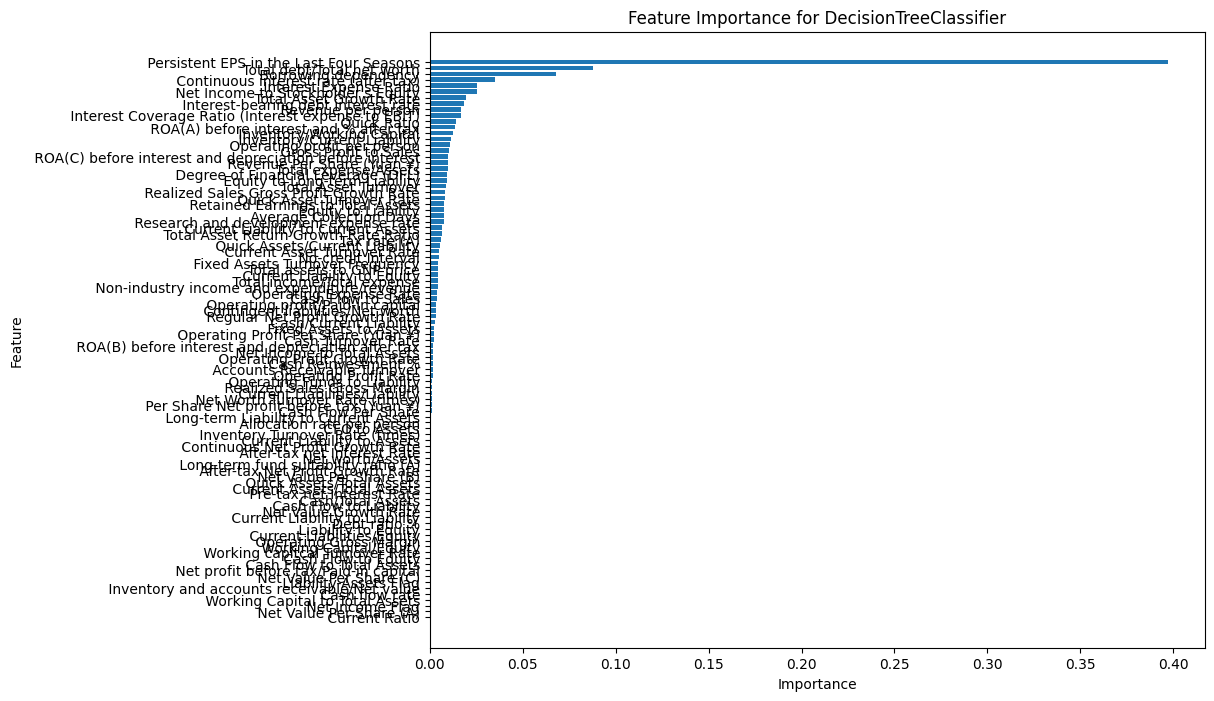

In [45]:
feature_importances = models['DecisionTreeClassifier'].feature_importances_

features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

features_df = features_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for DecisionTreeClassifier')
plt.show()

In [46]:
num_features_to_keep = X.shape[1] // 2

top_features = features_df.sort_values(by='Importance', ascending=False).head(num_features_to_keep)

X_top_features = X[top_features['Feature']]

X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.3, random_state=42)

In [47]:
param_grid_gb = {'max_depth' : np.arange(0, 15, 1),
                 'min_samples_split' : np.arange(1, 7, 1),
                 'min_samples_leaf' : np.arange(1, 4, 1),
                 'criterion' :['gini', 'entropy', 'log_loss']
                }

grid_search_gb = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid_gb, cv=3, scoring='f1', n_jobs=-1, verbose=3)

grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

best_params_gb, best_score_gb

Fitting 3 folds for each of 810 candidates, totalling 2430 fits


({'criterion': 'gini',
  'max_depth': 9,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 0.883526423606677)

In [48]:
cv_results = []
scores = cross_val_score(grid_search_gb.best_estimator_, X_test, y_test, cv=5, scoring='f1')
cv_results.append(scores)

cv_results

[array([0.82733813, 0.82876712, 0.83508772, 0.82481752, 0.84137931])]

In [49]:
train_sizes, train_scores, test_scores = learning_curve(grid_search_gb.best_estimator_, X_top_features, y, cv=3, scoring='f1', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

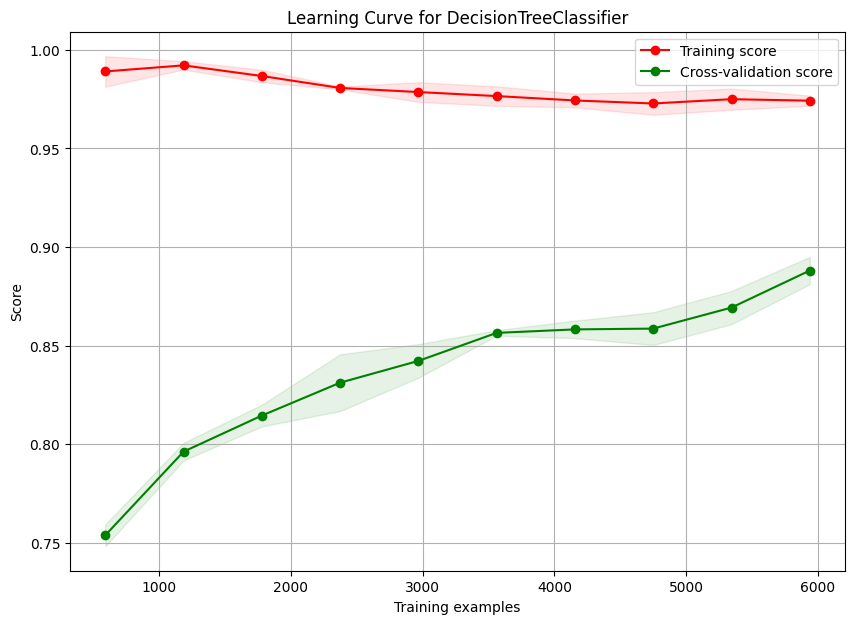

In [50]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for DecisionTreeClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Dimensionality reduction

In [51]:
from sklearn.decomposition import PCA

In [52]:
reg = GradientBoostingRegressor(random_state=42, learning_rate=0.1, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
X = df.drop(columns=' Net Income to Total Assets')
y = df[' Net Income to Total Assets']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
X_train.shape

(6235, 95)

In [55]:
pca = PCA(n_components=len(X.columns)//4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [56]:
X_train_pca.shape

(6235, 23)

In [57]:
reg.fit(X_train_pca, y_train)

y_pred = reg.predict(X_test_pca)

print("RMSE_test: ", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE_test:  0.03485628360591531


In [58]:
classif = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=13, min_samples_leaf=1, min_samples_split=6)
X = df.drop(columns='Bankrupt?')
y = df['Bankrupt?']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
X_train.shape

(6235, 95)

In [61]:
pca = PCA(n_components=len(X.columns)//3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [62]:
X_train_pca.shape

(6235, 31)

In [63]:
classif.fit(X_train_pca, y_train)

y_pred = classif.predict(X_test_pca)

print("F1_test: ", f1_score(y_test,y_pred))

F1_test:  0.8455172413793103


# Clustering

In [4]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import silhouette_score

In [5]:
df_clustering = df.copy()

scaler = StandardScaler()

scaler.fit(df_clustering)
df_clustering = pd.DataFrame(scaler.transform(df_clustering))

inertia = []
k_values = range(1, 30)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_clustering)
    inertia.append(kmeans.inertia_)

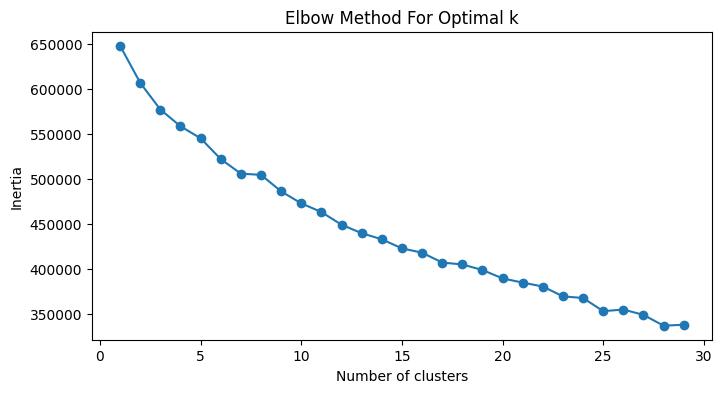

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

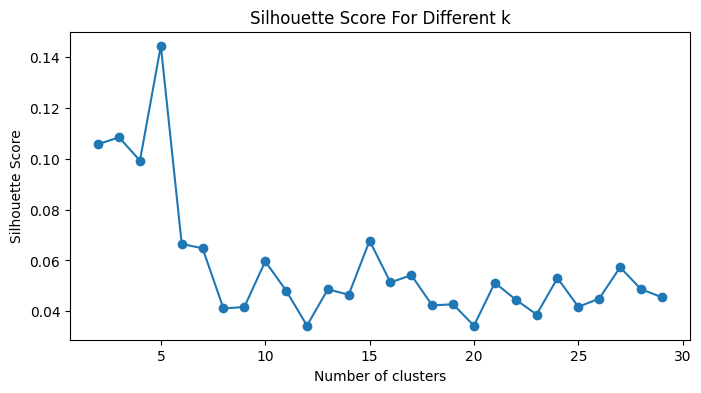

In [7]:
silhouette_scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_clustering)
    score = silhouette_score(df_clustering, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 30), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score For Different k')
plt.show()

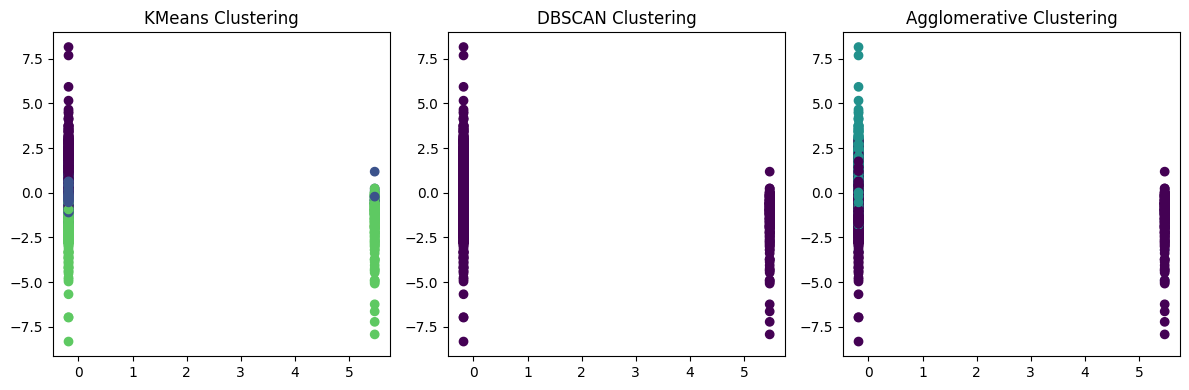

In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(df_clustering)

dbscan = DBSCAN(min_samples=3)
dbscan_labels = dbscan.fit_predict(df_clustering)

agglo = AgglomerativeClustering(n_clusters=5)
agglo_labels = agglo.fit_predict(df_clustering)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
plt.scatter(df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(df_clustering.iloc[:, 0], df_clustering.iloc[:, 1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

In [10]:
max(dbscan.labels_)

-1

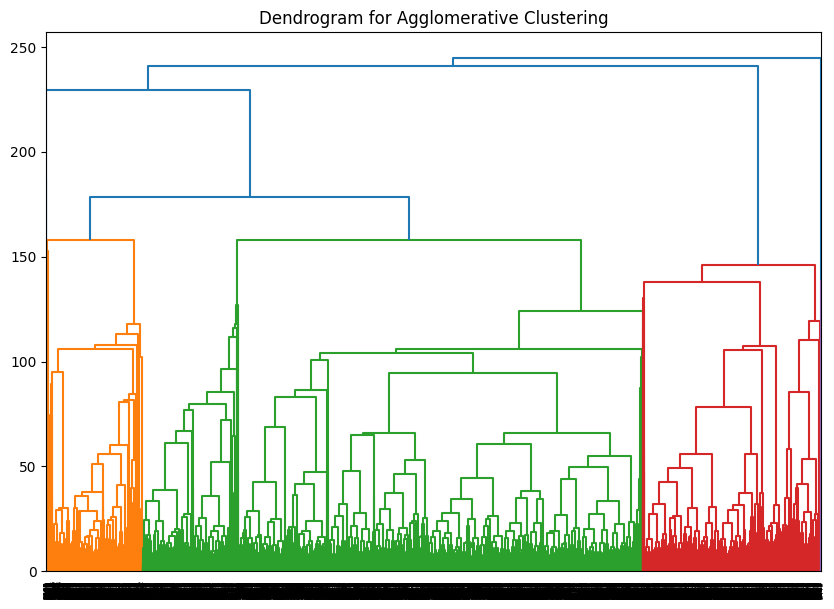

In [9]:
linked = linkage(df_clustering, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.show()